In [ ]:
# eu instalei no terminal mesmo
!pip install tensorflow
!pip install streamlit

In [5]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [70]:
#Fetch Images count from Fodlers

In [26]:
count = 0 
dirs = os.listdir('imagens/')
for dir in dirs:
    files = list(os.listdir('imagens/'+dir))
    print( dir +' tem: '+ str(len(files)) + ' imagens')
    count = count + len(files)
print( 'A pasta imagens tem: '+ str(count) + ' imagens')

Dente de Leao tem: 1052 imagens
Girassois tem: 733 imagens
Margaridas tem: 764 imagens
Rosas tem: 784 imagens
Tulipas tem: 984 imagens
A pasta imagens tem: 4317 imagens


In [27]:
#Load Images into Arrays as Dataset

In [28]:
base_dir = 'imagens/'
img_size = 180
batch = 32

In [29]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [30]:
flower_names = train_ds.class_names
flower_names

['Dente de Leao', 'Girassois', 'Margaridas', 'Rosas', 'Tulipas']

In [31]:
import matplotlib.pyplot as plt

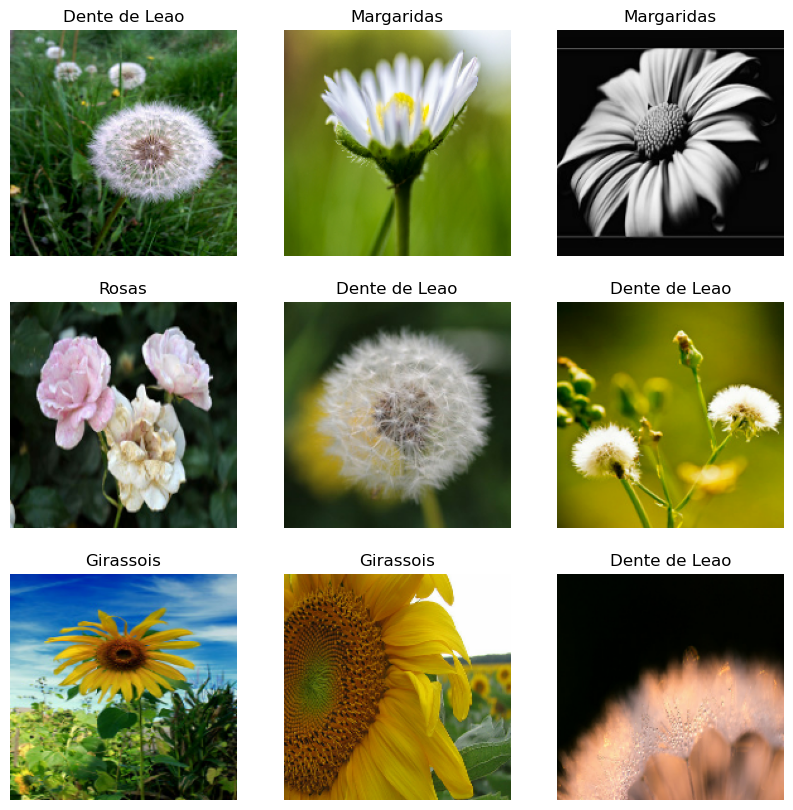

In [33]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [34]:
AUTOTUNE = tf.data.AUTOTUNE

In [35]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [36]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [37]:
#Data Augmentation

In [40]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size,img_size,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

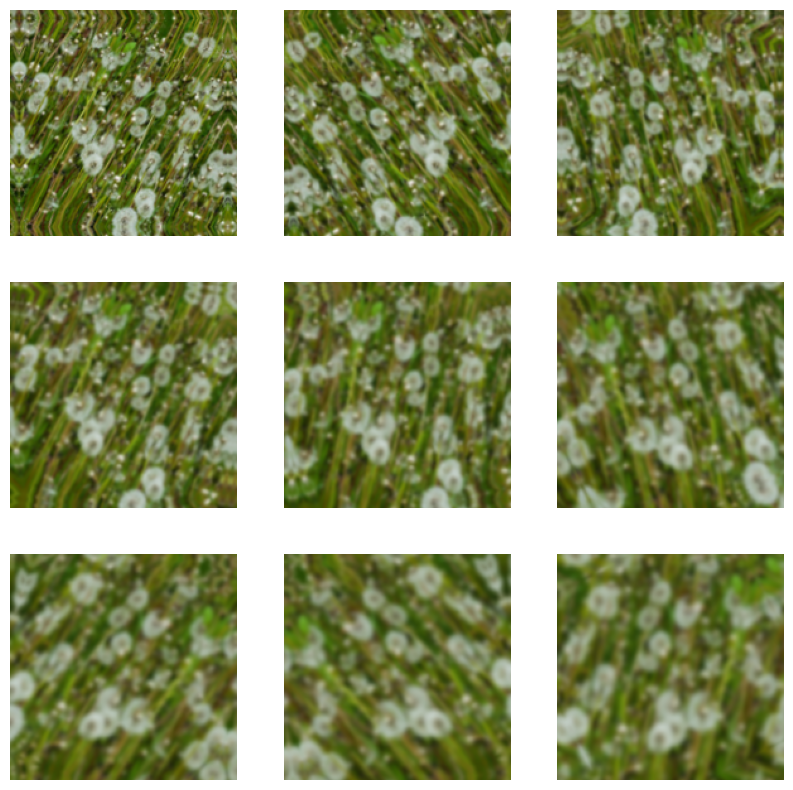

In [48]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [49]:
#MOdel Creation

In [50]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)            │ (1, 180, 180, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_1 (Rescaling)              │ (1, 180, 180, 3)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (1, 180, 180, 16)           │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (1, 90, 90, 16)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (1, 90, 90, 32)             │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (1, 45, 45, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (1, 45, 45, 64)             │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (1, 22, 22, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (1, 22, 22, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (1, 30976)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (1, 128)                    │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (1, 5)                      │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [67]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 44s 362ms/step - accuracy: 0.3466 - loss: 1.6535 - val_accuracy: 0.5319 - val_loss: 1.1492
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 37s 343ms/step - accuracy: 0.5643 - loss: 1.1053 - val_accuracy: 0.5921 - val_loss: 1.0173
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 325ms/step - accuracy: 0.5997 - loss: 1.0307 - val_accuracy: 0.5886 - val_loss: 1.0273
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 310ms/step - accuracy: 0.6290 - loss: 0.9534 - val_accuracy: 0.6466 - val_loss: 0.8978
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 35s 320ms/step - accuracy: 0.6596 - loss: 0.8624 - val_accuracy: 0.6454 - val_loss: 0.8953
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 308ms/step - accuracy: 0.6711 - loss: 0.8191 - val_accuracy: 0.6813 - val_loss: 0.8308
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 33s 309ms/step - accuracy: 0.6961 - loss: 0.8008 - val_accuracy: 0.6674 - val_loss: 0.8774
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 34s 318ms/step - accuracy: 0.7170 - loss: 0

In [68]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [91]:
classify_images('amostra/flor2.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


'The Image belongs to Girassois with a score of 98.0403184890747'

In [89]:
model.save('Flower_Recog_Model.keras')